In [3]:
#https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
#The idea is straightforward, replace numbers with colors.
#Now, this visualization style came a long way from simple color-coded 
#tables, it became widely used with geospatial data, 
#and its commonly applied for describing density or intensity of variables,
#visualize patterns, variance, and even anomalies.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [4]:
# read file
df = pd.read_csv('Foreign_Exchange_Rates.csv')
print(df)
df = pd.read_csv('Foreign_Exchange_Rates.csv', 
                 usecols=[1,7], names=['DATE', 'CAD_USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])
print(df)

      Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0              0  2000-01-03                            1.5172   
1              1  2000-01-04                            1.5239   
2              2  2000-01-05                            1.5267   
3              3  2000-01-06                            1.5291   
4              4  2000-01-07                            1.5272   
5              5  2000-01-10                            1.5242   
6              6  2000-01-11                            1.5209   
7              7  2000-01-12                            1.5202   
8              8  2000-01-13                            1.4954   
9              9  2000-01-14                            1.5004   
10            10  2000-01-17                                ND   
11            11  2000-01-18                             1.506   
12            12  2000-01-19                            1.5074   
13            13  2000-01-20                            1.5002   
14        

In [31]:
df['CAD_USD'] = pd.to_numeric(df.CAD_USD, errors='coerce')
df.dropna(inplace=True)
print(df)

            CAD_USD
DATE               
2000-01-03   1.4465
2000-01-04   1.4518
2000-01-05   1.4518
2000-01-06   1.4571
2000-01-07   1.4505
2000-01-10   1.4568
2000-01-11   1.4570
2000-01-12   1.4550
2000-01-13   1.4495
2000-01-14   1.4497
2000-01-18   1.4502
2000-01-19   1.4527
2000-01-20   1.4484
2000-01-21   1.4420
2000-01-24   1.4400
2000-01-25   1.4389
2000-01-26   1.4379
2000-01-27   1.4350
2000-01-28   1.4495
2000-01-31   1.4517
2000-02-01   1.4468
2000-02-02   1.4435
2000-02-03   1.4417
2000-02-04   1.4467
2000-02-07   1.4457
2000-02-08   1.4473
2000-02-09   1.4443
2000-02-10   1.4500
2000-02-11   1.4515
2000-02-14   1.4547
...             ...
2019-11-18   1.3210
2019-11-19   1.3233
2019-11-20   1.3317
2019-11-21   1.3277
2019-11-22   1.3293
2019-11-25   1.3312
2019-11-26   1.3285
2019-11-27   1.3284
2019-11-29   1.3291
2019-12-02   1.3298
2019-12-03   1.3298
2019-12-04   1.3212
2019-12-05   1.3177
2019-12-06   1.3255
2019-12-09   1.3228
2019-12-10   1.3231
2019-12-11   1.3202


In [34]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()
print(df_m)


             CAD_USD
month year          
1     2000  1.448600
      2001  1.503200
      2002  1.599714
      2003  1.541448
      2004  1.295755
      2005  1.224835
      2006  1.157165
      2007  1.176262
      2008  1.009943
      2009  1.224820
      2010  1.043811
      2011  0.993945
      2012  1.012985
      2013  0.992057
      2014  1.094010
      2015  1.212190
      2016  1.420811
      2017  1.318305
      2018  1.242905
      2019  1.330045
2     2000  1.451210
      2001  1.521563
      2002  1.596400
      2003  1.512147
      2004  1.329895
      2005  1.240053
      2006  1.148895
      2007  1.170989
      2008  0.998555
      2009  1.245200
...              ...
11    2010  1.012900
      2011  1.024755
      2012  0.996970
      2013  1.048642
      2014  1.132539
      2015  1.327853
      2016  1.343415
      2017  1.277335
      2018  1.320480
      2019  1.323658
12    2000  1.521875
      2001  1.578755
      2002  1.559219
      2003  1.312755
      2004  1

In [35]:
df_m = df_m.unstack(level=0)
print(df_m)

        CAD_USD                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2000   1.448600  1.451210  1.460774  1.468875  1.495736  1.477045  1.477785   
2001   1.503200  1.521563  1.558741  1.557767  1.541050  1.524538  1.530790   
2002   1.599714  1.596400  1.587743  1.581486  1.550155  1.531840  1.545550   
2003   1.541448  1.512147  1.476081  1.458205  1.383957  1.352510  1.382091   
2004   1.295755  1.329895  1.328578  1.341973  1.378860  1.357841  1.322505   
2005   1.224835  1.240053  1.216026  1.235900  1.255529  1.240168  1.222855   
2006   1.157165  1.148895  1.157309  1.144105  1.109991  1.113727  1.129445   
2007   1.176262  1.170989  1.168159  1.134986  1.095086  1.065105  1.050186   
2008   1.009943  0.998555  1.002943  1.013718  0.999305  1.016624  1.012964   
2009   1.224820  1.245200  1.264518  1.224182  1.152

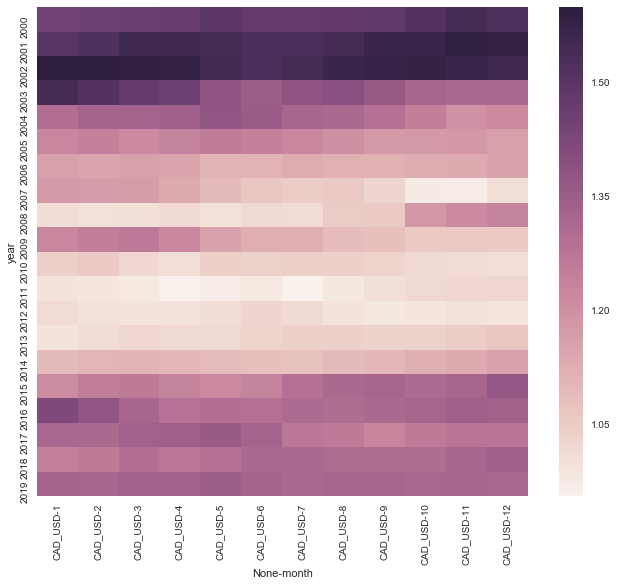

In [37]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df_m)
plt.show()

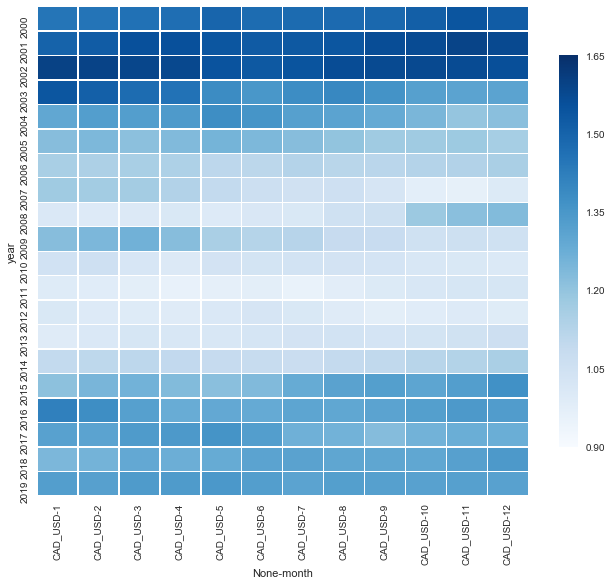

In [38]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

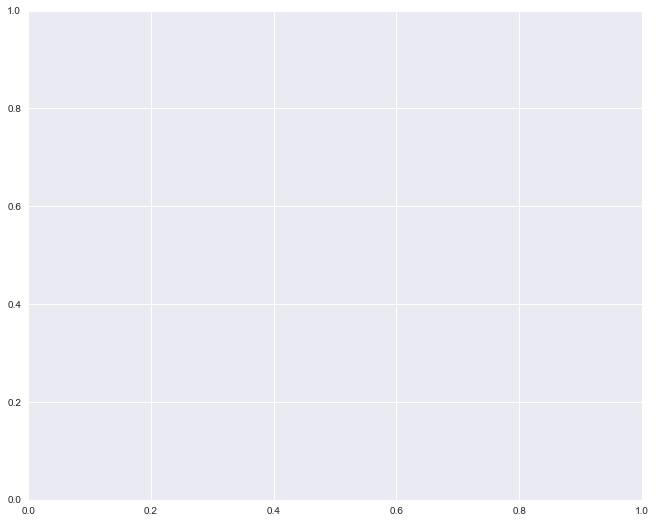

In [60]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
plt.show()

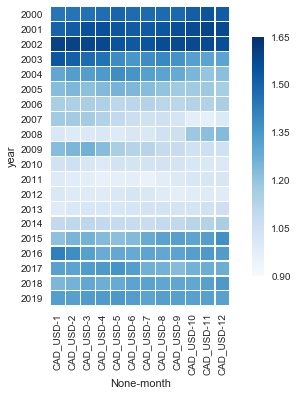

In [61]:
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

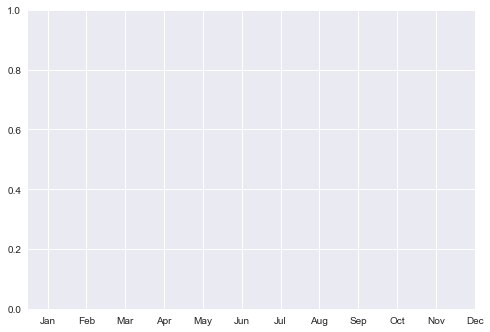

In [62]:
ax.xaxis.tick_top()
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = np.arange(0.5, 12)
plt.xticks(y, labels)    #optional to set the class names for the bars

plt.show()

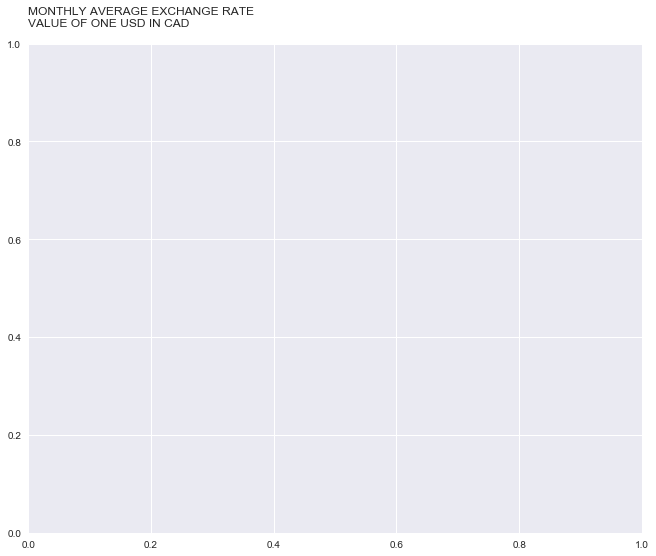

In [6]:
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')
plt.show()

In [7]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = np.arange(0.5, 12)
plt.xticks(y, labels)    #optional to set the class names for the bars

plt.show()
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')

NameError: name 'df_m' is not defined